In [ ]:
**Задание 1.** Загрузите файл HR.csv в pandas dataframe

In [ ]:
import pandas as pd

df = pd.read_csv('https://drive.google.com/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Задание 2.** Рассчитайте основные статистики для переменных (среднее,медиана,мода, мин/макс,сред.отклонение)

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
for column in [column for column in df]:
  print(f'Mode {column}: {df[column].mode()[0]}')

Mode satisfaction_level: 0.1
Mode last_evaluation: 0.55
Mode number_project: 4
Mode average_montly_hours: 135
Mode time_spend_company: 3
Mode Work_accident: 0
Mode left: 0
Mode promotion_last_5years: 0
Mode department: sales
Mode salary: low


**Задание 3.** Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

In [ ]:
corr_matrix_pearson = df.select_dtypes(include=['int', 'float']).corr()
corr_matrix_pearson

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


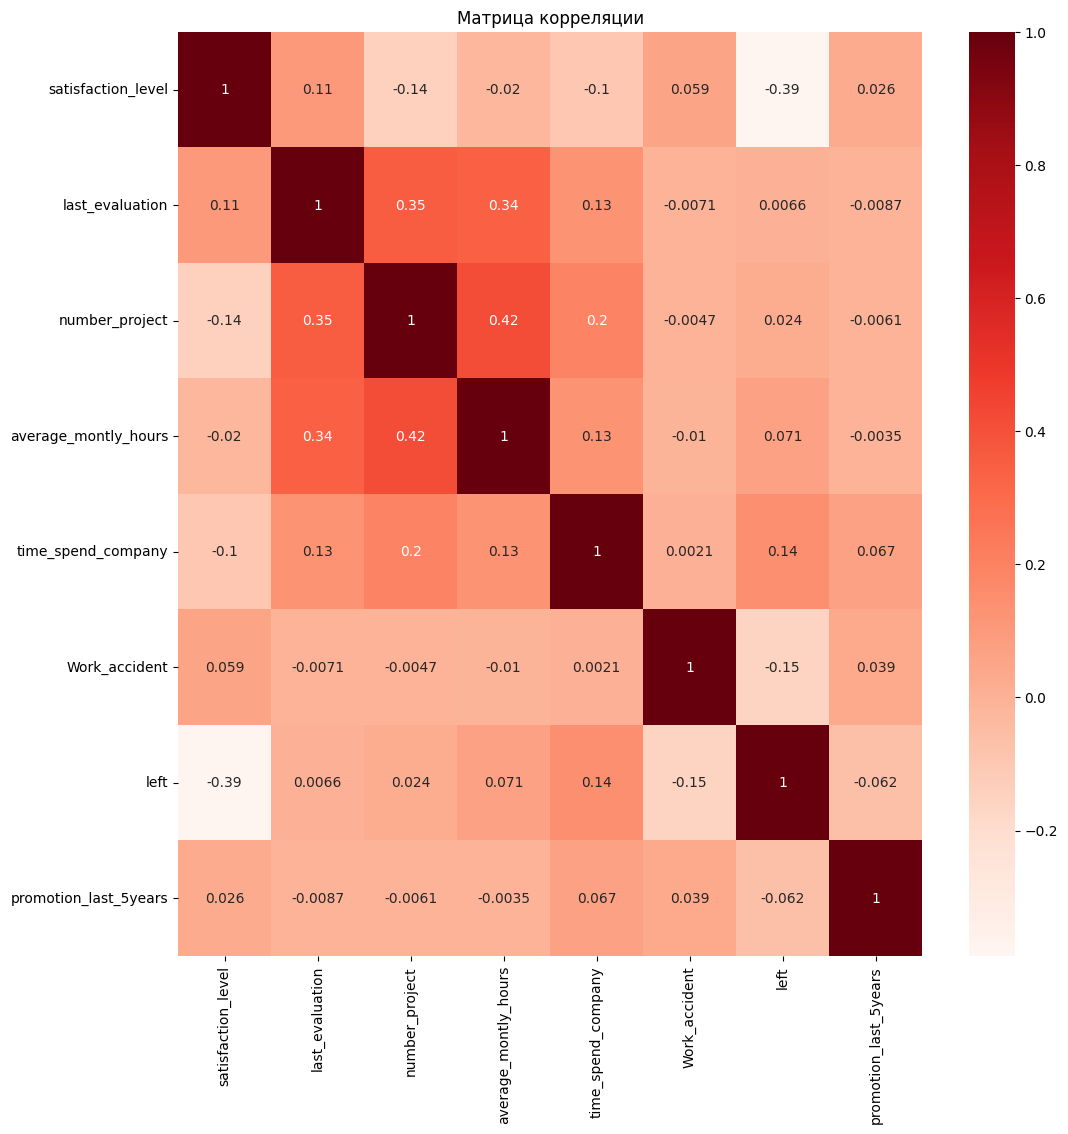

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[12,12])
sns.heatmap(corr_matrix_pearson, annot=True, cmap='Reds')
plt.title("Матрица корреляции")
plt.show()

**Две самые скоррелированные переменные:** Количество проектов и Среднее количество часов на рабочем месте

**Две наименее скоррелированные переменные:** Уровень удовлетворенности работой и факт увольнения

**Задание 4.** Рассчитайте сколько сотрудников работает в каждом
департаменте

In [ ]:
df.value_counts('department')

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
dtype: int64

**Задание 5.** Показать распределение сотрудников по зарплатам

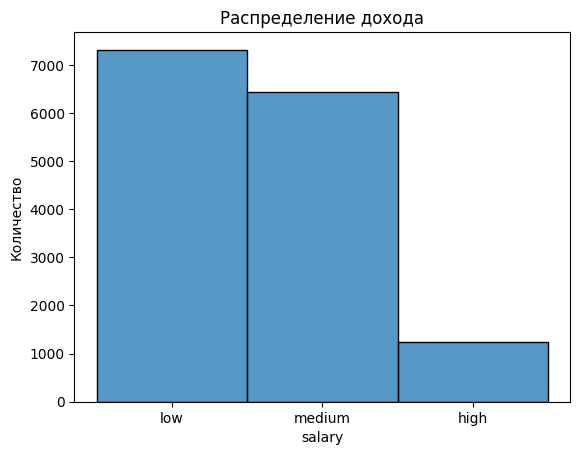

In [ ]:
sns.histplot(data=df, x="salary", bins=25)
plt.title("Распределение дохода")
plt.ylabel("Количество")
plt.show()

**Задание 6.** Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

<Axes: xlabel='department', ylabel='Probability'>

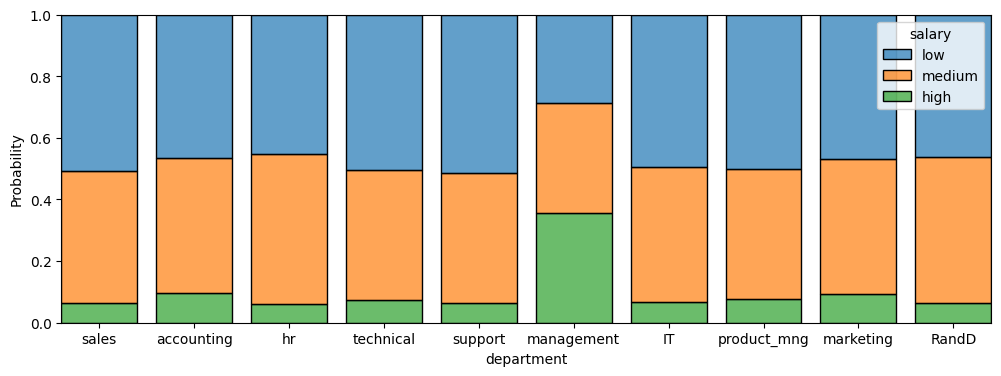

In [ ]:
plt.figure(figsize=[12,4])

sns.histplot(
    data = df,
    x='department',
    hue='salary',
    stat='probability',
    multiple='fill',
    shrink=.8, alpha=0.7
)

**Задание 7.** Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [ ]:
df.value_counts('salary')

salary
low       7316
medium    6446
high      1237
dtype: int64

In [ ]:
import scipy.stats as st
import numpy as np
#При большом размере выборки нормальность распределения для тетса Стьюдента не важна
#Проверяем равенство дисперсий

employees_with_high_salary = df[df['salary'] == 'high']['average_montly_hours']
employees_with_low_salary = df[df['salary'] == 'low']['average_montly_hours']

f = np.var(employees_with_high_salary)/np.var(employees_with_low_salary)
dfh = employees_with_high_salary.size-1
dfl = employees_with_low_salary.size-1

p = 1-st.f.cdf(f, dfh, dfl-1)
print(f"p = {p}")
if p < 0.05:
  print("Отклоняем нулевую гипотезу, дисперсии не равны.")
else:
    print("Не отклоняем нулевую гипотезу, дисперсии равны.")

p = 0.9979824446892247
Не отклоняем нулевую гипотезу, дисперсии равны.


In [ ]:
#проверяем гипотезу
stat, p = st.ttest_ind(employees_with_high_salary, employees_with_low_salary, equal_var = True)
print(f"Статистика = {stat:.5f}, p = {p}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние вероятно, различаются')


Статистика = -0.72887, p = 0.4661023478267259
Не отклоняем нулевую гипотезу, средние вероятно, одинаковые


По результатам анализа гипотеза не подтверждается, сотрудники с высоким окладом проводят на работе столько же времени, как и сотрудники с низким окладом

**Задание 8.** Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

In [ ]:
df.groupby('left').agg({
    'promotion_last_5years' : 'mean',
    'satisfaction_level' : 'mean',
    'number_project' : 'mean'
})

,promotion_last_5years,satisfaction_level,number_project
left,,,
0,0.026251,0.666810,3.786664
1,0.005321,0.440098,3.855503


**Задание 9.** Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [ ]:
from sklearn. model_selection import train_test_split
from sklearn. discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

#Делим на признак и целевую переменную
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

#Делим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Обучение модели LDA
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7536
